In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Question 5

### (a) Equally spaced points.

We use Newton Form and recursive construction, using divided difference.

$$[y_i, y_{i+1}, ..., y_{i+k-1}, y_{i+k}] = \frac{[y_{i+1}, y_{i+2}, ..., y_{i+k}] - [y_{i}, y_{i+1}, ..., y_{i+k-1}]}{x_{i+k} - x_i}$$

In [2]:
def divided_difference(x, y):
    """x, y are numpy arrays"""
    n, = x.shape
    C = np.zeros((n, n))
    # base case
    C[:, 0] = y
    # induction
    for k in range(1, n):
        for pos in range(0, n - k):
            C[pos, k] = (C[pos + 1, k - 1] - C[pos, k - 1]) * 1. / (x[pos + k] - x[pos])
    
    return C[0, :]

In [3]:
def f(x):
    """ x is a vector """
    return np.reciprocal(1 + x ** 2)

In [4]:
def newton_poly(C, X, x_i):
    n, = C.shape
    result = C[0]
    for i in range(1, n):
        current_term = C[i]
        for j in range(i):
            current_term *= (x_i - X[j])
        result += current_term
    return result

We want to derive interpolations for $n \in {2, 4, 8, 12, 30}.$

In [5]:
n = np.array([2, 4, 8, 12, 30])

In [6]:
# Use a list to save coefficients of each n
coefficients = {}
x_arrays = {}
y_arrays = {}
y_hat_arrays = {}

for i, num in enumerate(n):
    x = np.linspace(-5., 5., num=num+1)
    y = f(x)
    C = divided_difference(x, y)
    x_arrays[num] = x
    y_arrays[num] = y
    coefficients[num] = C
    
    y_hat = []
    for j, x_i in enumerate(x):
        y_hat.append(newton_poly(C, x, x_i))
    y_hat_arrays[num] = np.array(y_hat)

In [7]:
coefficients

{2: array([ 0.03846154,  0.19230769, -0.03846154]),
 4: array([ 0.03846154,  0.0397878 ,  0.06100796, -0.0265252 ,  0.00530504]),
 8: array([ 0.03846154,  0.0223428 ,  0.013956  ,  0.01170427,  0.00067434,
        -0.00489646,  0.00243964, -0.00068722,  0.00013744]),
 12: array([ 3.84615385e-02,  1.92016758e-02,  8.71522265e-03,  4.36374111e-03,
         2.50597905e-03,  1.12202352e-03, -1.57095945e-03,  1.10425196e-04,
         3.42766710e-04, -2.12223424e-04,  7.39158656e-05, -1.86342518e-05,
         3.72685037e-06]),
 30: array([ 3.84615385e-02,  1.63227017e-02,  5.48306175e-03,  1.72761644e-03,
         5.37369068e-04,  1.67942232e-04,  5.26265068e-05,  1.60612570e-05,
         4.29513799e-06,  5.10201522e-07, -6.41752695e-07, -8.76765459e-07,
        -7.02016688e-07, -2.03027783e-07,  4.49090014e-07,  3.52724455e-07,
        -5.09998349e-07,  1.08881927e-07,  1.64264236e-07, -1.77179451e-07,
         9.72196197e-08, -3.58584975e-08,  9.02594525e-09, -1.14302821e-09,
        -2.54

Therefore, the unique interpolating polynomials are:

$$P_n(x) = c_{n0} + \sum_{i=1}^{n} c_{ni} \prod_{j=0}^{i-1}(x - x_j)$$

where $c_{ni} (0 \leq i \leq n)$ is one of the above coefficients.

In [8]:
x_arrays

{2: array([-5.,  0.,  5.]),
 4: array([-5. , -2.5,  0. ,  2.5,  5. ]),
 8: array([-5.  , -3.75, -2.5 , -1.25,  0.  ,  1.25,  2.5 ,  3.75,  5.  ]),
 12: array([-5.        , -4.16666667, -3.33333333, -2.5       , -1.66666667,
        -0.83333333,  0.        ,  0.83333333,  1.66666667,  2.5       ,
         3.33333333,  4.16666667,  5.        ]),
 30: array([-5.        , -4.66666667, -4.33333333, -4.        , -3.66666667,
        -3.33333333, -3.        , -2.66666667, -2.33333333, -2.        ,
        -1.66666667, -1.33333333, -1.        , -0.66666667, -0.33333333,
         0.        ,  0.33333333,  0.66666667,  1.        ,  1.33333333,
         1.66666667,  2.        ,  2.33333333,  2.66666667,  3.        ,
         3.33333333,  3.66666667,  4.        ,  4.33333333,  4.66666667,
         5.        ])}

In [9]:
y_arrays

{2: array([0.03846154, 1.        , 0.03846154]),
 4: array([0.03846154, 0.13793103, 1.        , 0.13793103, 0.03846154]),
 8: array([0.03846154, 0.06639004, 0.13793103, 0.3902439 , 1.        ,
        0.3902439 , 0.13793103, 0.06639004, 0.03846154]),
 12: array([0.03846154, 0.05446293, 0.08256881, 0.13793103, 0.26470588,
        0.59016393, 1.        , 0.59016393, 0.26470588, 0.13793103,
        0.08256881, 0.05446293, 0.03846154]),
 30: array([0.03846154, 0.04390244, 0.0505618 , 0.05882353, 0.06923077,
        0.08256881, 0.1       , 0.12328767, 0.15517241, 0.2       ,
        0.26470588, 0.36      , 0.5       , 0.69230769, 0.9       ,
        1.        , 0.9       , 0.69230769, 0.5       , 0.36      ,
        0.26470588, 0.2       , 0.15517241, 0.12328767, 0.1       ,
        0.08256881, 0.06923077, 0.05882353, 0.0505618 , 0.04390244,
        0.03846154])}

In [10]:
y_hat_arrays

{2: array([0.03846154, 1.        , 0.03846154]),
 4: array([0.03846154, 0.13793103, 1.        , 0.13793103, 0.03846154]),
 8: array([0.03846154, 0.06639004, 0.13793103, 0.3902439 , 1.        ,
        0.3902439 , 0.13793103, 0.06639004, 0.03846154]),
 12: array([0.03846154, 0.05446293, 0.08256881, 0.13793103, 0.26470588,
        0.59016393, 1.        , 0.59016393, 0.26470588, 0.13793103,
        0.08256881, 0.05446293, 0.03846154]),
 30: array([0.03846154, 0.04390244, 0.0505618 , 0.05882353, 0.06923077,
        0.08256881, 0.1       , 0.12328767, 0.15517241, 0.2       ,
        0.26470588, 0.36      , 0.5       , 0.69230769, 0.9       ,
        1.        , 0.9       , 0.69230769, 0.5       , 0.36      ,
        0.26470588, 0.2       , 0.15517241, 0.12328767, 0.1       ,
        0.08256881, 0.06923076, 0.0588235 , 0.05056177, 0.04390236,
        0.03846083])}

Now we have coefficients of $p_n(x)$ for each n, and we want to print predicted $2n$ points.

In [11]:
prediction = {}
for i, num in enumerate(n):
    x = np.linspace(-5., 5., num=2 * num)
    prediction[num] = {}
    prediction[num]["x"] = x
    y = []
    for j, x_i in enumerate(x):
        y.append(newton_poly(coefficients[num], x_arrays[num], x_i))
    prediction[num]["p_n(x)"] = np.array(y)
    prediction[num]["f(x)"] = f(x)

The values of $f(x)$ and $p_n(x)$ for each n are printed below:

In [12]:
prediction

{2: {'x': array([-5.        , -1.66666667,  1.66666667,  5.        ]),
  'p_n(x)': array([0.03846154, 0.89316239, 0.89316239, 0.03846154]),
  'f(x)': array([0.03846154, 0.26470588, 0.26470588, 0.03846154])},
 4: {'x': array([-5.        , -3.57142857, -2.14285714, -0.71428571,  0.71428571,
          2.14285714,  3.57142857,  5.        ]),
  'p_n(x)': array([ 0.03846154, -0.31914808,  0.32625056,  0.91409139,  0.91409139,
          0.32625056, -0.31914808,  0.03846154]),
  'f(x)': array([0.03846154, 0.0727003 , 0.17883212, 0.66216216, 0.66216216,
         0.17883212, 0.0727003 , 0.03846154])},
 8: {'x': array([-5.        , -4.33333333, -3.66666667, -3.        , -2.33333333,
         -1.66666667, -1.        , -0.33333333,  0.33333333,  1.        ,
          1.66666667,  2.33333333,  3.        ,  3.66666667,  4.33333333,
          5.        ]),
  'p_n(x)': array([ 0.03846154, -0.77516293,  0.14733469,  0.30493442,  0.09397683,
          0.15776341,  0.56362343,  0.94252303,  0.94252303,  0

Plotting the error $|P_n(x) - f(x)|$ as $n$ increases at the point $x = 1 + \sqrt{10}$:

In [13]:
error = []
for i, num in enumerate(n):
    error.append(np.abs(newton_poly(coefficients[num], x_arrays[num], 1 + np.sqrt(10)) - f(1 + np.sqrt(10))))
error = np.array(error)

In [14]:
error

array([0.27909937, 0.42633122, 0.5679242 , 0.01645701, 7.06040153])

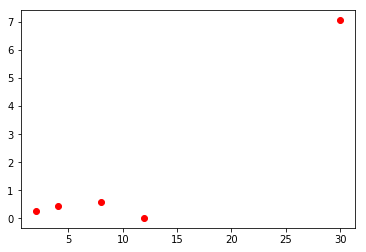

In [15]:
plt.plot(n, error, "ro")
plt.show()

### (b) "Chebyshev nodes"

Generate a list of chebyshev nodes:

In [16]:
def chebyshev_list(A, n):
    chebyshev_nodes = []
    for i in range(0, n):
        chebyshev_nodes.append(A * np.cos( (2 * i + 1.) * np.pi / (2 * n + 2) ))
    return np.array(chebyshev_nodes)

In [17]:
# Use a list to save coefficients of each n
chebyshev_coefficients = {}
chebyshev_x_arrays = {}
chebyshev_y_arrays = {}
chebyshev_y_hat_arrays = {}
for i, num in enumerate(n):
    x = chebyshev_list(5., num + 1)
    y = f(x)
    C = divided_difference(x, y)
    chebyshev_x_arrays[num] = x
    chebyshev_y_arrays[num] = y
    chebyshev_coefficients[num] = C
    
    y_hat = []
    for j, x_i in enumerate(x):
        y_hat.append(newton_poly(C, x, x_i))
    chebyshev_y_hat_arrays[num] = np.array(y_hat)

In [18]:
chebyshev_coefficients

{2: array([ 0.04476509, -0.06274012, -0.00960384]),
 4: array([ 0.04110943, -0.02547312,  0.03062655,  0.00952379,  0.00113851]),
 8: array([ 3.93883673e-02, -1.77477821e-02,  7.58714568e-03, -4.27444144e-03,
         3.38689975e-03,  2.65197826e-03,  7.65075642e-04,  1.32567258e-04,
         1.41126971e-05]),
 12: array([ 3.89308061e-02, -1.62060115e-02,  5.61005961e-03, -2.02810449e-03,
         8.61201764e-04, -4.52097328e-04,  1.05439112e-04,  3.44218783e-04,
         1.75928312e-04,  5.12980042e-05,  1.05109955e-05,  1.60453790e-06,
         1.65621552e-07]),
 30: array([ 3.85507849e-02, -1.50496072e-02,  4.43955639e-03, -1.18221135e-03,
         3.01890872e-04, -7.61647299e-05,  1.93030191e-05, -4.94864719e-06,
         1.27473111e-06, -3.16916263e-07,  6.36001209e-08,  3.13613106e-09,
        -1.96976388e-08,  2.17990980e-08, -1.48084686e-08, -6.88719749e-09,
         1.39677377e-08,  1.33668386e-08,  4.87816500e-09,  2.02396432e-10,
        -7.36893804e-10, -4.82666562e-10, -1.

In [19]:
chebyshev_x_arrays

{2: array([ 4.61939766,  1.91341716, -1.91341716]),
 4: array([ 4.82962913,  3.53553391,  1.29409523, -1.29409523, -3.53553391]),
 8: array([ 4.9384417 ,  4.45503262,  3.53553391,  2.2699525 ,  0.78217233,
        -0.78217233, -2.2699525 , -3.53553391, -4.45503262]),
 12: array([ 4.96856105,  4.71941665,  4.233621  ,  3.53553391,  2.66016038,
         1.65139531,  0.55982238, -0.55982238, -1.65139531, -2.66016038,
        -3.53553391, -4.233621  , -4.71941665]),
 30: array([ 4.99397728,  4.94588255,  4.85015627,  4.70772033,  4.51994647,
         4.28864305,  4.01603766,  3.70475563,  3.35779477,  2.97849652,
         2.57051372,  2.13777547,  1.68444927,  1.2149009 ,  0.73365237,
         0.24533837, -0.24533837, -0.73365237, -1.2149009 , -1.68444927,
        -2.13777547, -2.57051372, -2.97849652, -3.35779477, -3.70475563,
        -4.01603766, -4.28864305, -4.51994647, -4.70772033, -4.85015627,
        -4.94588255])}

In [20]:
chebyshev_y_arrays

{2: array([0.04476509, 0.21453863, 0.21453863]),
 4: array([0.04110943, 0.07407407, 0.37387616, 0.37387616, 0.07407407]),
 8: array([0.03938837, 0.04796781, 0.07407407, 0.16253068, 0.62042685,
        0.62042685, 0.16253068, 0.07407407, 0.04796781]),
 12: array([0.03893081, 0.04296844, 0.05284422, 0.07407407, 0.12381673,
        0.26830465, 0.76138203, 0.76138203, 0.26830465, 0.12381673,
        0.07407407, 0.05284422, 0.04296844]),
 30: array([0.03855078, 0.03927459, 0.04077636, 0.04317299, 0.04666374,
        0.05156644, 0.05838203, 0.06791073, 0.08146782, 0.10130233,
        0.13144852, 0.17953051, 0.26059519, 0.4038798 , 0.65009116,
        0.94322634, 0.94322634, 0.65009116, 0.4038798 , 0.26059519,
        0.17953051, 0.13144852, 0.10130233, 0.08146782, 0.06791073,
        0.05838203, 0.05156644, 0.04666374, 0.04317299, 0.04077636,
        0.03927459])}

In [21]:
chebyshev_y_hat_arrays

{2: array([0.04476509, 0.21453863, 0.21453863]),
 4: array([0.04110943, 0.07407407, 0.37387616, 0.37387616, 0.07407407]),
 8: array([0.03938837, 0.04796781, 0.07407407, 0.16253068, 0.62042685,
        0.62042685, 0.16253068, 0.07407407, 0.04796781]),
 12: array([0.03893081, 0.04296844, 0.05284422, 0.07407407, 0.12381673,
        0.26830465, 0.76138203, 0.76138203, 0.26830465, 0.12381673,
        0.07407407, 0.05284422, 0.04296844]),
 30: array([0.03855078, 0.03927459, 0.04077636, 0.04317299, 0.04666374,
        0.05156644, 0.05838203, 0.06791073, 0.08146782, 0.10130233,
        0.13144852, 0.17953051, 0.26059519, 0.4038798 , 0.65009116,
        0.94322634, 0.94322634, 0.65009116, 0.4038798 , 0.26059519,
        0.17953051, 0.13144852, 0.10130233, 0.08146782, 0.06791073,
        0.05838203, 0.05156644, 0.04666374, 0.04317299, 0.04077641,
        0.03927462])}

Print the values of $f(x)$ and $p_n(x)$ at $2n$ points:

In [22]:
chebyshev_prediction = {}
for i, num in enumerate(n):
    x = chebyshev_list(5., 2 * num)
    chebyshev_prediction[num] = {}
    chebyshev_prediction[num]["x"] = x
    y = []
    for j, x_i in enumerate(x):
        y.append(newton_poly(chebyshev_coefficients[num], chebyshev_x_arrays[num], x_i))
    chebyshev_prediction[num]["p_n(x)"] = np.array(y)
    chebyshev_prediction[num]["f(x)"] = f(x)

In [23]:
chebyshev_prediction

{2: {'x': array([ 4.75528258e+00,  2.93892626e+00,  3.06161700e-16, -2.93892626e+00]),
  'p_n(x)': array([0.03253097, 0.16674874, 0.24969988, 0.16674874]),
  'f(x)': array([0.04235007, 0.10376364, 1.        , 0.10376364])},
 4: {'x': array([ 4.92403877e+00,  4.33012702e+00,  3.21393805e+00,  1.71010072e+00,
          3.06161700e-16, -1.71010072e+00, -3.21393805e+00, -4.33012702e+00]),
  'p_n(x)': array([0.05061981, 0.0224855 , 0.11279996, 0.32563989, 0.44408866,
         0.32563989, 0.11279996, 0.0224855 ]),
  'f(x)': array([0.03960999, 0.05063291, 0.08826594, 0.25481314, 1.        ,
         0.25481314, 0.08826594, 0.05063291])},
 8: {'x': array([ 4.97867088e+00,  4.80912822e+00,  4.47581646e+00,  3.99008614e+00,
          3.36847822e+00,  2.63216081e+00,  1.80620833e+00,  9.18747589e-01,
          3.06161700e-16, -9.18747589e-01, -1.80620833e+00, -2.63216081e+00,
         -3.36847822e+00, -3.99008614e+00, -4.47581646e+00, -4.80912822e+00]),
  'p_n(x)': array([0.04506956, 0.03104308, 

For $n = 8$, plot the two polynomials obtained by "Chebyshev nodes" and "equi-spaced node" and compare with the true function:

In [24]:
chebyshev_x_8 = chebyshev_prediction[8]["x"]
chebyshev_y_8 = chebyshev_prediction[8]["p_n(x)"]
chebyshev_f_x_8 = chebyshev_prediction[8]["f(x)"]
x_8 = prediction[8]["x"]
y_8 = prediction[8]["p_n(x)"]
f_x_8 = prediction[8]["f(x)"]

In [25]:
chebyshev_x_8

array([ 4.97867088e+00,  4.80912822e+00,  4.47581646e+00,  3.99008614e+00,
        3.36847822e+00,  2.63216081e+00,  1.80620833e+00,  9.18747589e-01,
        3.06161700e-16, -9.18747589e-01, -1.80620833e+00, -2.63216081e+00,
       -3.36847822e+00, -3.99008614e+00, -4.47581646e+00, -4.80912822e+00])

In [26]:
chebyshev_y_8

array([0.04506956, 0.03104308, 0.04636364, 0.07473618, 0.07127579,
       0.1010403 , 0.28830315, 0.5822167 , 0.73082166, 0.5822167 ,
       0.28830315, 0.1010403 , 0.07127579, 0.07473618, 0.04636364,
       0.03104308])

In [27]:
chebyshev_f_x_8

array([0.03877898, 0.04144611, 0.04754449, 0.0590989 , 0.08099366,
       0.12613091, 0.23461024, 0.54227079, 1.        , 0.54227079,
       0.23461024, 0.12613091, 0.08099366, 0.0590989 , 0.04754449,
       0.04144611])

In [28]:
x_8

array([-5.        , -4.33333333, -3.66666667, -3.        , -2.33333333,
       -1.66666667, -1.        , -0.33333333,  0.33333333,  1.        ,
        1.66666667,  2.33333333,  3.        ,  3.66666667,  4.33333333,
        5.        ])

In [29]:
y_8

array([ 0.03846154, -0.77516293,  0.14733469,  0.30493442,  0.09397683,
        0.15776341,  0.56362343,  0.94252303,  0.94252303,  0.56362343,
        0.15776341,  0.09397683,  0.30493442,  0.14733469, -0.77516293,
        0.03846154])

In [30]:
f_x_8

array([0.03846154, 0.0505618 , 0.06923077, 0.1       , 0.15517241,
       0.26470588, 0.5       , 0.9       , 0.9       , 0.5       ,
       0.26470588, 0.15517241, 0.1       , 0.06923077, 0.0505618 ,
       0.03846154])

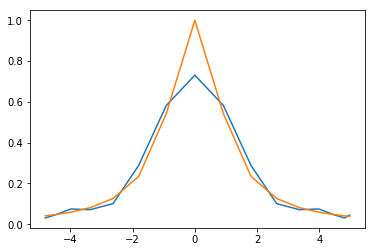

In [31]:
plt.plot(chebyshev_x_8, chebyshev_y_8, chebyshev_x_8, chebyshev_f_x_8)
plt.show()

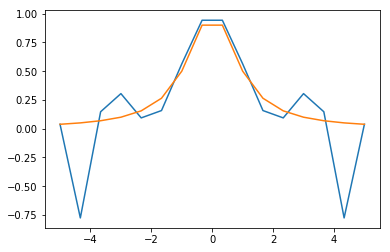

In [32]:
plt.plot(x_8, y_8, x_8, f_x_8)
plt.show()

Print the polynomials such that they look "smoother":

In [33]:
plot_x_8 = np.arange(-5., 5., 0.02)
plot_y_8 = []
plot_chebyshev_y_8 = []
plot_f_x_8 = f(plot_x_8)

for i, x_i in enumerate(plot_x_8):
    plot_y_8.append(newton_poly(coefficients[8], x_arrays[8], x_i))
    plot_chebyshev_y_8.append(newton_poly(chebyshev_coefficients[8], chebyshev_x_arrays[8], x_i))

Equi-spaced $P_8(x)$ against $f(x)$:

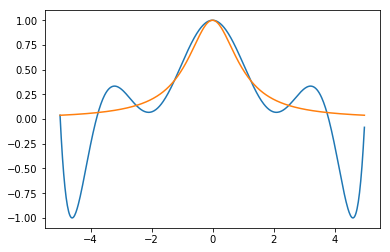

In [34]:
plt.plot(plot_x_8, plot_y_8, plot_x_8, plot_f_x_8)
plt.show()

Chebyshev $P_8(x)$ against $f(x)$:

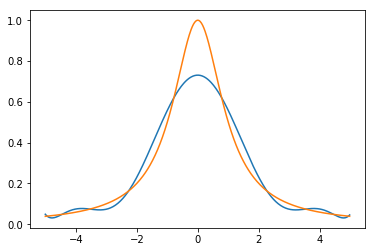

In [35]:
plt.plot(plot_x_8, plot_chebyshev_y_8, plot_x_8, plot_f_x_8)
plt.show()

The Chebyshev polynomial approximates better using the interpolation error definition in Question 2(b): $$e_n = \max_{0 \leq x \leq 1} |f(x) - P_n(x)|$$

Since $e_{equi-spaced} \approx 1$, $e_{Chebyshev} \approx 0.3$ over $[-5, 5]$, the Chebyshev polynomial approximates better.